In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

In [62]:
df = pd.read_csv("data/20200124_is24_buyrent_plus_lieferando.csv", sep=";")
df.head(3).transpose()

,0,1,2
Unnamed: 0,0,1,2
city,Berlin,Berlin,Berlin
hasCourtage,NO,NO,NO
houseNo,13,13,13
id,115408865,115408859,115408828
latitude,52.5504,52.5504,52.5504
longitude,13.2143,13.2143,13.2143
marketingType,PURCHASE,PURCHASE,PURCHASE
n_page_is24,1,1,1
n_room,4,4,4


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 21 columns):
Unnamed: 0               10015 non-null int64
city                     10015 non-null object
hasCourtage              6740 non-null object
houseNo                  6416 non-null object
id                       10015 non-null int64
latitude                 6363 non-null float64
longitude                6363 non-null float64
marketingType            10015 non-null object
n_page_is24              10015 non-null int64
n_room                   10015 non-null float64
postcode                 10015 non-null int64
privateOffer             10015 non-null bool
purchase_price           6740 non-null float64
purchase_price_per_qm    6734 non-null float64
qm                       10015 non-null float64
quarter                  10015 non-null object
rent_cold                3275 non-null float64
rent_cold_per_qm         3275 non-null float64
street                   6416 non-null object
title

In [64]:
df = df[df["marketingType"] == "RENT"]

In [65]:
df["price_per_qm"] = df["purchase_price_per_qm"] 
df.price_per_qm.fillna(df.rent_cold_per_qm, inplace=True)

In [66]:
[[column, df[column].count() / len(df)] for column in df if df[column].count() / len(df) >= 0.3]

[['Unnamed: 0', 1.0],
 ['city', 1.0],
 ['houseNo', 0.8549618320610687],
 ['id', 1.0],
 ['latitude', 0.8412213740458016],
 ['longitude', 0.8412213740458016],
 ['marketingType', 1.0],
 ['n_page_is24', 1.0],
 ['n_room', 1.0],
 ['postcode', 1.0],
 ['privateOffer', 1.0],
 ['qm', 1.0],
 ['quarter', 1.0],
 ['rent_cold', 1.0],
 ['rent_cold_per_qm', 1.0],
 ['street', 0.8549618320610687],
 ['title', 1.0],
 ['n_restaurant', 0.9960305343511451],
 ['price_per_qm', 1.0]]

In [67]:
print(df['price_per_qm'].describe())

count    3275.000000
mean       15.302626
std         6.641701
min         5.100000
25%        10.800000
50%        14.000000
75%        18.200000
max        76.200000
Name: price_per_qm, dtype: float64


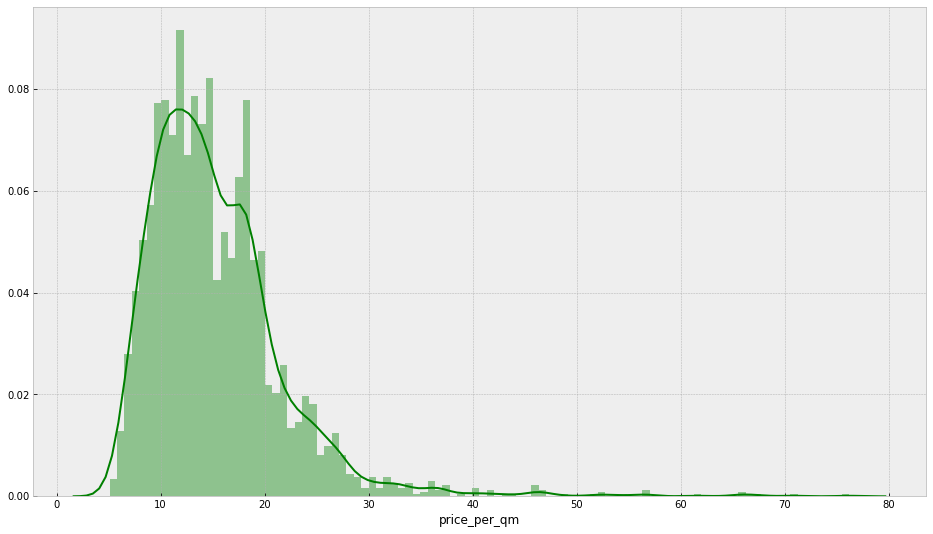

In [68]:
plt.figure(figsize=(16, 9))
sns.distplot(df['price_per_qm'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [69]:
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('int64'), dtype('bool'), dtype('O')]

In [70]:
df_num = df.select_dtypes(include = ['float64', 'int64'])

In [71]:
df_num.columns

Index(['Unnamed: 0', 'id', 'latitude', 'longitude', 'n_page_is24', 'n_room',
       'postcode', 'purchase_price', 'purchase_price_per_qm', 'qm',
       'rent_cold', 'rent_cold_per_qm', 'n_restaurant', 'price_per_qm'],
      dtype='object')

In [72]:
df_num = df[['n_room', 'qm', 'n_restaurant', 'price_per_qm']]

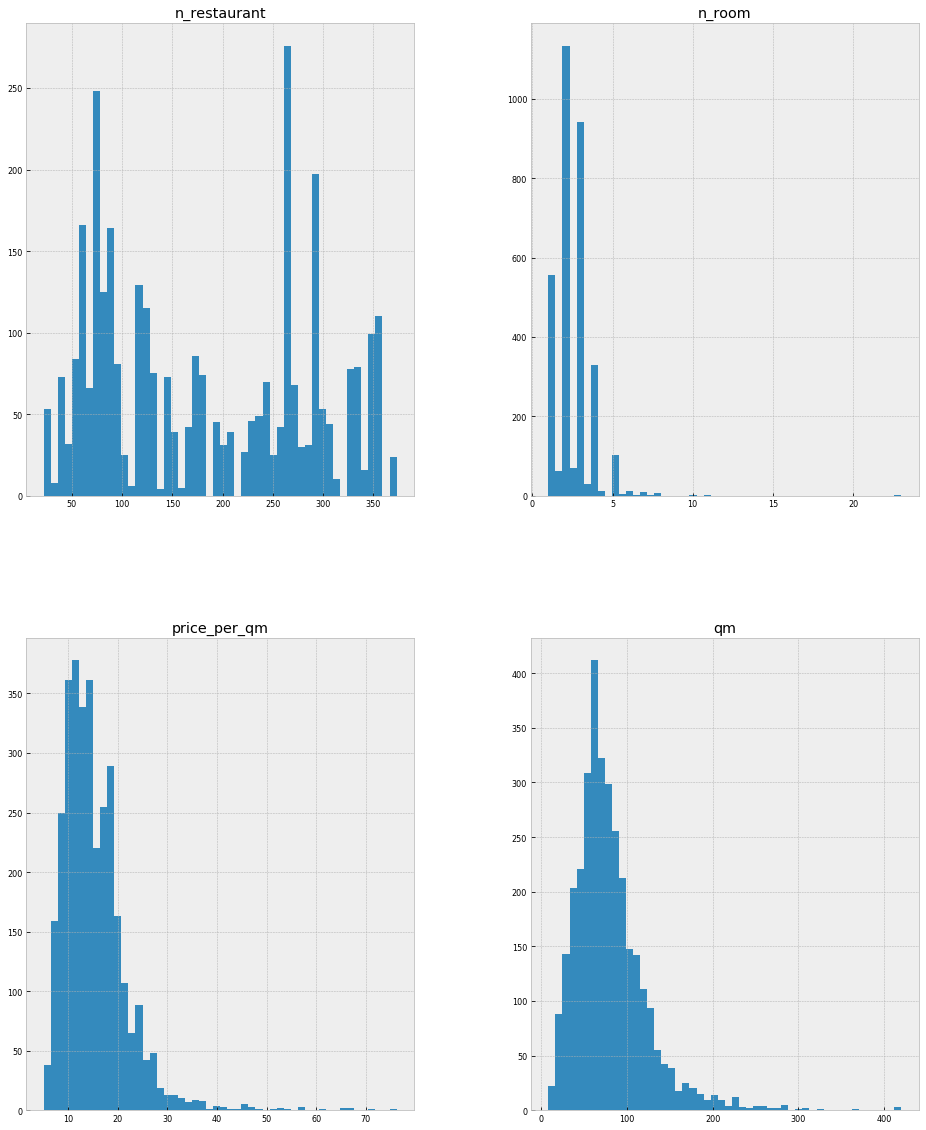

In [73]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

In [74]:
df_num_corr = df_num.corr()['price_per_qm'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0].sort_values(ascending=False)
print("There is {} strongly correlated values with price_per_qm:\n{}".format(len(golden_features_list), golden_features_list))

There is 3 strongly correlated values with price_per_qm:
n_restaurant    0.517367
qm             -0.102896
n_room         -0.115067
Name: price_per_qm, dtype: float64


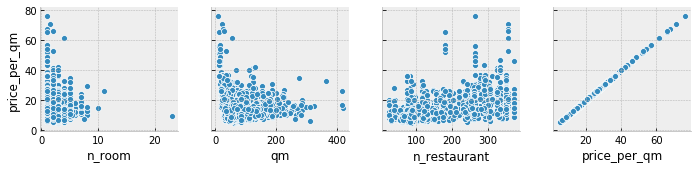

In [75]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['price_per_qm'])

In [76]:
import operator

individual_features_df = []
for i in range(0, len(df_num.columns) - 1): # -1 because the last column is SalePrice
    tmpDf = df_num[[df_num.columns[i], 'price_per_qm']]
    tmpDf = tmpDf[tmpDf[df_num.columns[i]] != 0]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['price_per_qm'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

n_room: -0.11506698199885572
             qm: -0.10289644340417219
   n_restaurant: 0.5173665244734097


In [77]:
golden_features_list = [key for key, value in all_correlations if abs(value) >= 0]
print("There is {} strongly correlated values with price_per_qm:\n{}".format(len(golden_features_list), golden_features_list))

There is 3 strongly correlated values with price_per_qm:
['n_room', 'qm', 'n_restaurant']


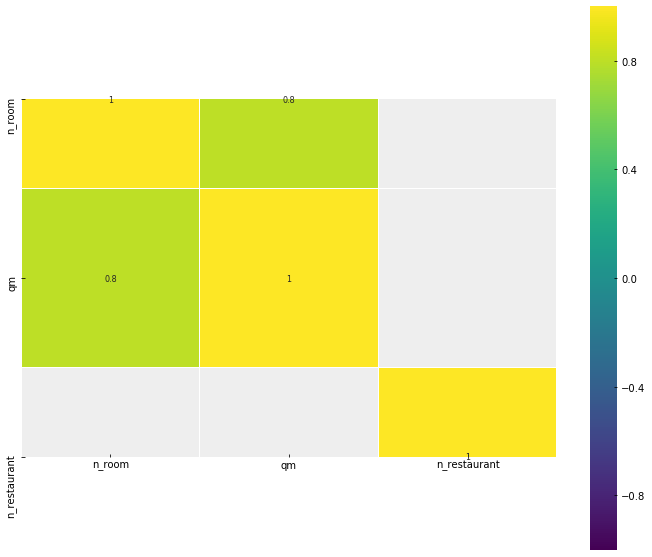

In [78]:
corr = df_num.drop('price_per_qm', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [79]:
features_to_analyse = [x for x in df_num.columns if x in golden_features_list]
features_to_analyse.append('price_per_qm')
features_to_analyse

['n_room', 'qm', 'n_restaurant', 'price_per_qm']

In [3]:
fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i],y='price_per_qm', data=df[features_to_analyse], ax=ax, x_estimator=np.mean)

NameError: name 'plt' is not defined

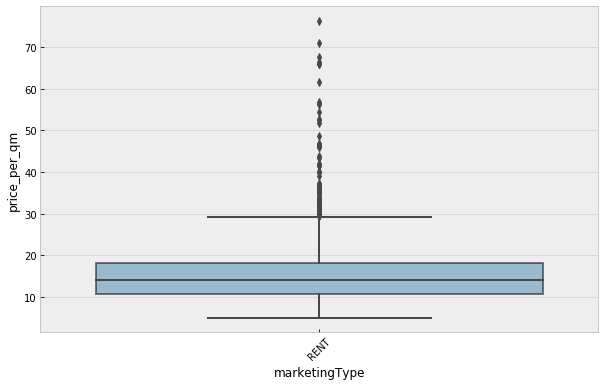

In [81]:
plt.figure(figsize = (10, 6));
ax = sns.boxplot(x='marketingType', y='price_per_qm', data=df);
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k");
plt.xticks(rotation=45);

In [82]:
df[df["marketingType"] == "PURCHASE"]

,Unnamed: 0,city,hasCourtage,houseNo,id,latitude,longitude,marketingType,n_page_is24,n_room,...,purchase_price,purchase_price_per_qm,qm,quarter,rent_cold,rent_cold_per_qm,street,title,n_restaurant,price_per_qm


In [83]:
df[df["marketingType"] == "RENT"]

,Unnamed: 0,city,hasCourtage,houseNo,id,latitude,longitude,marketingType,n_page_is24,n_room,...,purchase_price,purchase_price_per_qm,qm,quarter,rent_cold,rent_cold_per_qm,street,title,n_restaurant,price_per_qm
6740,6740,Berlin,NaN,85,115168796,52.54634,13.18475,RENT,1,2.0,...,NaN,NaN,60.52,Spandau (Spandau),497.17,8.2,Zeppelinstr.,Diese Wohnung wird modernisiert!,87.0,8.2
6741,6741,Berlin,NaN,19,115461269,52.54320,13.20322,RENT,1,4.0,...,NaN,NaN,112.67,Spandau (Spandau),1016.00,9.0,Groener Straße,"Besichtigung am Sonntag, den 26.01. um 13:30 U...",82.0,9.0
6742,6742,Berlin,NaN,7,115439152,52.51967,13.20104,RENT,1,2.0,...,NaN,NaN,65.46,Spandau (Spandau),532.19,8.1,Weverstr.,Wilhelmstädter Wohnung mit viel Platz!,75.0,8.1
6743,6743,Berlin,NaN,125a\n,114618260,52.61370,13.49547,RENT,1,3.0,...,NaN,NaN,89.15,Karow (Weißensee),1158.95,13.0,Am Hohen Feld,Sofort bezugsfertig: 3-Zimmer-Dachgeschosswohn...,29.0,13.0
6744,6744,Berlin,NaN,125a\n,109894326,52.61370,13.49547,RENT,1,2.0,...,NaN,NaN,66.61,Karow (Weißensee),799.32,12.0,Am Hohen Feld,Sofort bezugsfertig: Tolle 2-Zimmer-Wohnung mi...,29.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,10010,Berlin,NaN,39,50530893,52.50742,13.49691,RENT,164,1.0,...,NaN,NaN,35.38,Lichtenberg (Lichtenberg),446.85,12.6,Weitlingstr.,"Besichtigung am 26.01.2020 um 14 Uhr, Super Si...",121.0,12.6
10011,10011,Berlin,NaN,77,48707439,52.50944,13.31841,RENT,164,3.0,...,NaN,NaN,86.00,Charlottenburg (Charlottenburg),1769.00,20.6,Schlüterstr,"Exklusive Citywohnung, teilmöbliert mit tollem...",311.0,20.6
10012,10012,Berlin,NaN,NaN,41726461,NaN,NaN,RENT,164,3.0,...,NaN,NaN,84.00,Zehlendorf (Zehlendorf),780.00,9.3,NaN,"3 Zi-Wohnung, WF 84 m², Balkon, komplett renov...",66.0,9.3
10013,10013,Berlin,NaN,56,40033609,52.64381,13.50323,RENT,164,3.0,...,NaN,NaN,83.50,Buch (Pankow),556.00,6.7,Viereckweg,provisionsfrei 3 Zi DG Wohnung Berlin-Buch idy...,29.0,6.7
